In [1]:
import pandas as pd
import numpy as np

housing = pd.read_csv("housing.csv")

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


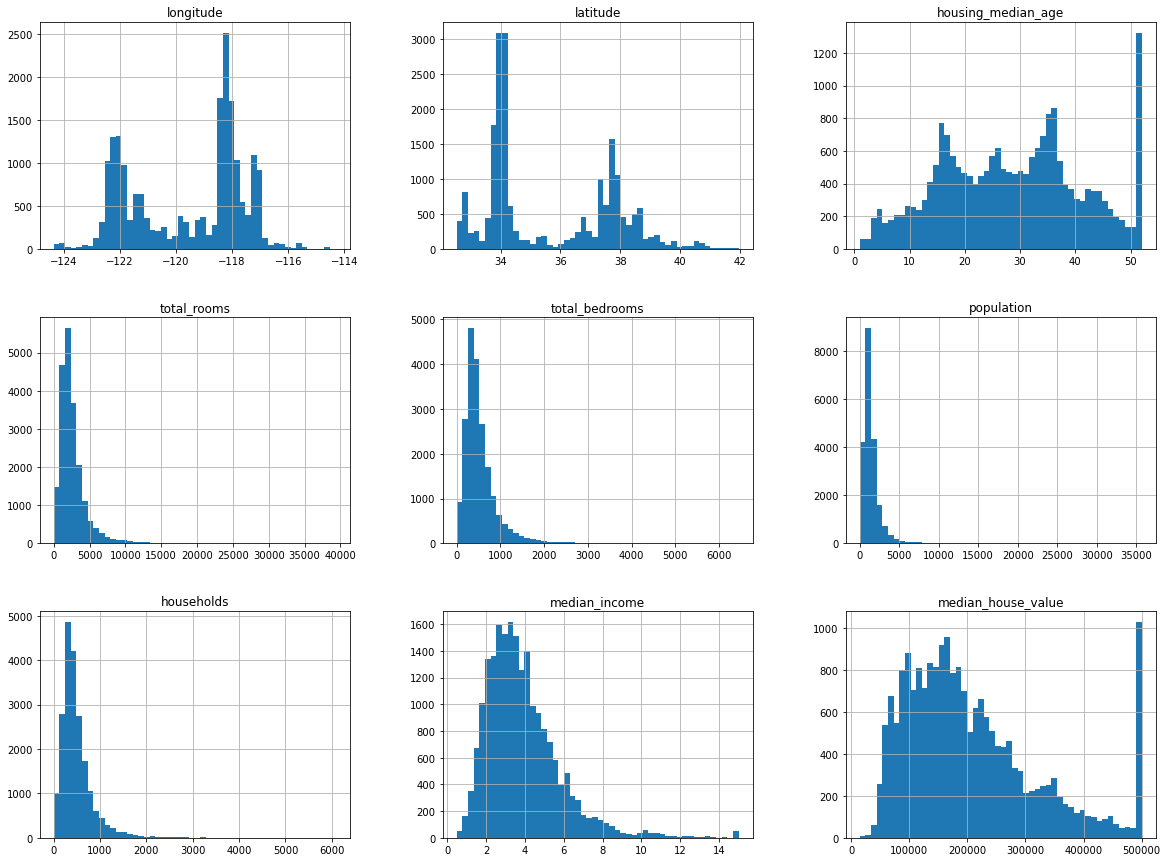

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

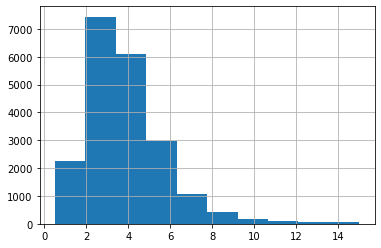

In [9]:
housing["median_income"].hist()

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [11]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

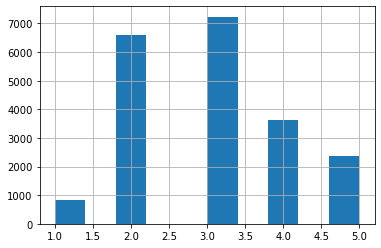

In [12]:
housing["income_cat"].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [15]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [17]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [19]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

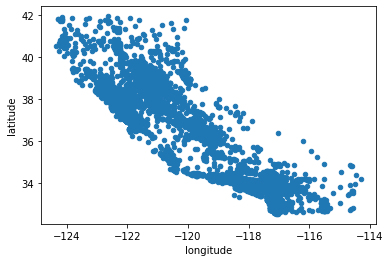

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

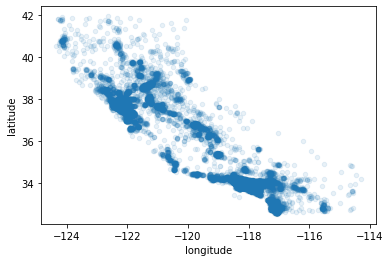

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

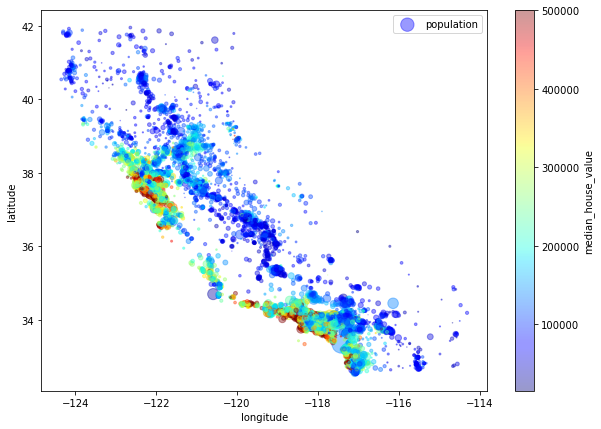

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [25]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [27]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [28]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [29]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [30]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [31]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [32]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [33]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [35]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [39]:
X = imputer.transform(housing_num)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [41]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [42]:
imputer.strategy

'median'

In [43]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [44]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [45]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [46]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [49]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [50]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [51]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [53]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [54]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [57]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [58]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
housing_prepared.shape

(16512, 16)

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [61]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [62]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [63]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [64]:
np.allclose(housing_prepared, old_housing_prepared)

True

In [65]:
import mlflow
import mlflow.sklearn

In [66]:
remote_server_uri = "http://127.0.0.1:5000"
mlflow.set_tracking_uri(remote_server_uri)

In [67]:
mlflow.tracking.get_tracking_uri()

'http://127.0.0.1:5000'

In [68]:
exp_name = "Linear Regression"
mlflow.set_experiment(exp_name)

2022/11/14 14:04:16 INFO mlflow.tracking.fluent: Experiment with name 'Linear Regression' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlruns/1', creation_time=1668414856160, experiment_id='1', last_update_time=1668414856160, lifecycle_stage='active', name='Linear Regression', tags={}>

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [70]:
type(housing_prepared)

numpy.ndarray

In [83]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
with mlflow.start_run():
    lin_reg.fit(housing_prepared, housing_labels)
    housing_predictions = lin_reg.predict(housing_prepared)
    lin_mse = mean_squared_error(housing_labels, housing_predictions)
    lin_rmse = np.sqrt(lin_mse)
    mlflow.log_metric(key="rmse", value=lin_rmse)
    lin_mae = mean_absolute_error(housing_labels, housing_predictions)
    mlflow.log_metric(key="mae", value=lin_mae)
    mlflow.sklearn.log_model(lin_reg, "model")

C:\ProgramData\Anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [66]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [67]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [68]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [69]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [70]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915801

In [85]:
exp_name = "Decision Tree Regression"
mlflow.set_experiment(exp_name)

2022/11/14 14:51:30 INFO mlflow.tracking.fluent: Experiment with name 'Decision Tree Regression' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlruns/2', creation_time=1668417690707, experiment_id='2', last_update_time=1668417690707, lifecycle_stage='active', name='Decision Tree Regression', tags={}>

In [86]:
from sklearn.tree import DecisionTreeRegressor
with mlflow.start_run():
    tree_reg = DecisionTreeRegressor(random_state=42)
    tree_reg.fit(housing_prepared, housing_labels)
    housing_predictions = tree_reg.predict(housing_prepared)
    tree_mse = mean_squared_error(housing_labels, housing_predictions)
    mlflow.log_metric(key="mse", value=tree_mse)
    tree_rmse = np.sqrt(tree_mse)
    mlflow.log_metric(key="rmse", value=tree_rmse)
    

## Better Evaluation Using Cross-Validation

In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [74]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [75]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818062


In [94]:
exp_name = "Random Forest Regression"
mlflow.set_experiment(exp_name)

2022/11/14 15:18:08 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest Regression' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlruns/3', creation_time=1668419289046, experiment_id='3', last_update_time=1668419289046, lifecycle_stage='active', name='Random Forest Regression', tags={}>

In [109]:
from sklearn.ensemble import RandomForestRegressor
def rftrain(n_estimators,max_features,bootstrap=True):
    with mlflow.start_run():
        forest_reg = RandomForestRegressor(bootstrap=bootstrap,n_estimators=n_estimators,max_features=max_features,random_state=42)
        forest_reg.fit(housing_prepared, housing_labels)
        housing_predictions = forest_reg.predict(housing_prepared)
        forest_mse = mean_squared_error(housing_labels, housing_predictions)
        forest_rmse = np.sqrt(forest_mse)
        print(forest_rmse)
        mlflow.log_param(key="n_estimator", value= n_estimators)
        mlflow.log_param(key="max_features", value= max_features)
        mlflow.log_param(key="bootstrap", value= bootstrap)
        
        mlflow.log_metric(key="RMSE", value =forest_rmse)
        mlflow.log_metric(key="MSE", value = forest_mse)
        
        mlflow.sklearn.log_model(forest_reg,"model")

In [110]:
nesti = [3,10,30]
maxfeat = [2,4,6,8]
for i in nesti:
    for j in maxfeat:
        rftrain(i,j)

32350.884512212826
30814.85251098241
29918.17073575049
29671.056407145203
23866.48144179066
22462.2544076894
22137.21171539672
22234.546644431415
20562.575585097762
19437.487156733558
19253.866896617285
19204.663429077467


In [111]:
nesti = [3,10]
maxfeat = [2,3,4]
for i in nesti:
    for j in maxfeat:
        rftrain(i,j,False)

0.0
0.0
45.85681803779296
0.0
0.11005636329070298
13.757045411337872


In [78]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [79]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [80]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [82]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [83]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [84]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [85]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053317,0.003679,0.003468,0.000244,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.160111,0.002588,0.009128,0.000299,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.479533,0.022430,0.025025,0.000877,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.079226,0.001873,0.003303,0.000135,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.268663,0.013199,0.009145,0.000315,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.792041,0.019191,0.024640,0.000594,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.109759,0.004558,0.003408,0.000203,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.363338,0.002098,0.009017,0.000168,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.100801,0.012964,0.024803,0.000269,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.145651,0.002167,0.003484,0.000175,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ac62ee5b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ac62ee430>},
                   random_state=42, scoring='neg_mean_squared_error')

In [87]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [88]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [89]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

In [90]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [91]:
final_rmse

47873.26095812988

In [92]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

In [93]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45893.360828285535, 49774.46796717361)

In [94]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45893.9540110131, 49773.921030650374)

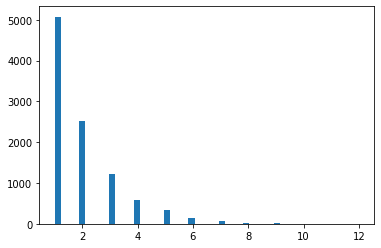

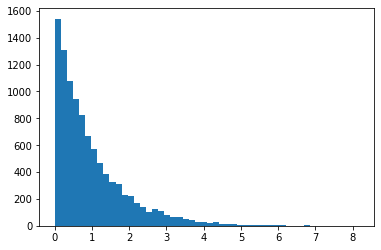

In [95]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

In [116]:
from sklearn.svm import SVR

def svrtrain(kernel,c,gamma="scale"):
    with mlflow.start_run():
        svm_reg = SVR(kernel = kernel, C = c, gamma=gamma)
        svm_reg.fit(housing_prepared, housing_labels)
        housing_predictions = svm_reg.predict(housing_prepared)
        svm_mse = mean_squared_error(housing_labels, housing_predictions)
        svm_rmse = np.sqrt(svm_mse)
        print(svm_rmse)
        mlflow.log_param(key="kernel", value= kernel)
        mlflow.log_param(key="C", value= c)
        mlflow.log_param(key="gamma", value= gamma)
        
        mlflow.log_metric(key="RMSE", value =svm_rmse)
        mlflow.log_metric(key="MSE", value = svm_mse)
        
        mlflow.sklearn.log_model(svm_reg,"model")

In [113]:
exp_name = "Support Vector Regression"
mlflow.set_experiment(exp_name)

2022/11/14 15:44:57 INFO mlflow.tracking.fluent: Experiment with name 'Support Vector Regression' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlruns/4', creation_time=1668420897490, experiment_id='4', last_update_time=1668420897490, lifecycle_stage='active', name='Support Vector Regression', tags={}>

In [117]:
C = [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]
kernel = "linear"

for i in C:
    svrtrain(kernel,i,gamma="scale")

81932.39323149915
74317.984805103
71258.59821420892
70470.07053288606
70255.9496819912
70203.48929068379
70177.7767140374
70158.80248081034


In [118]:
C= [1.0, 3.0, 10., 30., 100., 300., 1000.0]
kernel = "rbf"
gamma = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]

for i in C:
    for j in gamma:
        svrtrain(kernel,i,j)

118792.69294449531
118640.19806581664
118582.58026565054
118735.9253212078
118882.87745631262
118913.58489210767
118507.98066324323
118102.33703854027
117864.44011679724
118333.46581075674
118794.50320701253
118900.48837395391
117574.6777873867
116143.66324725917
115512.22153934602
117010.78324232728
118478.02056616016
118847.62929118173
114942.30617316278
111077.5690566253
109357.27267708986
113547.62506135386
117696.04077758055
118694.57479340577
106993.53479022616
97605.03875863581
95552.8773946644
104392.34857688221
114994.04631918046
118184.38733880018
91808.93043188653
81619.46366848143
81789.16195770269
92593.02668586474
108970.4984489527
116844.02115996522
76286.21333067189
70513.70562253246
69955.67717566997
78657.71023527312
97985.88958729734
112643.35882534515


In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   5.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.8s
[CV] END .............................C=100.0, kernel=linear; total time=   4.7s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   6.6s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   6.6s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   6.4s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   6.7s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   6.5s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   6.5s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   6.4s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   6.3s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=   6.4s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   6.4s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   6.4s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=   6.9s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=   5.9s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   6.1s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   6.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   6.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   6.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=   6.1s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   6.1s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   6.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   5.9s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   5.9s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   5.8s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [97]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.61836196149

In [98]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.4s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   5.8s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   5.7s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   5.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   3.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   3.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   3.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   3.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   3.7s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.1min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.1min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.1min
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=   3.7s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   5.9s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   5.8s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   5.9s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   5.9s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   5.9s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   3.9s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.0s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ac8e5f190>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ac8c0c880>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [100]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256622

In [101]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

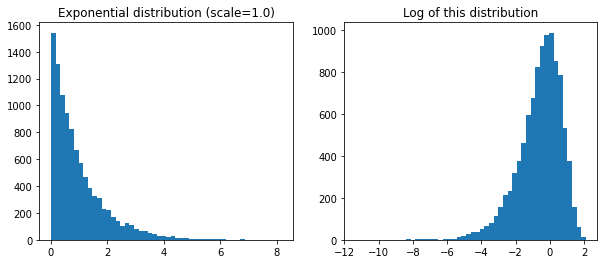

In [102]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

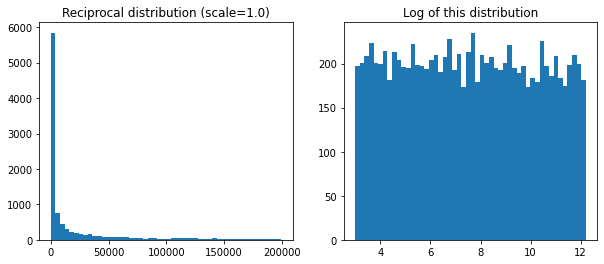

In [103]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [105]:
k = 5

In [106]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [107]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [108]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

In [109]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [110]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [111]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [112]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [113]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [114]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [115]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


In [116]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   4.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.0s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   4.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   5.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   5.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   5.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   5.0s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   4.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   5.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   5.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   5.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   5.0s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   4.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   5.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   5.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   5.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   5.2s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   4.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.2s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   4.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   5.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   5.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   5.8s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   5.8s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   4.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.3s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   4.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   5.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   5.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   5.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   5.5s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   4.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   5.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   5.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   5.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   5.3s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   4.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   5.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   5.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   5.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   5.6s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   4.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.6s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   4.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   5.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   5.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   5.6s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   4.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   5.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   5.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   5.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   5.9s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   4.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   5.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   5.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   5.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   5.9s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   4.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   5.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   5.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   6.0s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   4.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   6.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.9s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   4.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   6.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.9s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   4.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   5.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   5.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.0s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   5.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.7s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   5.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.4s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   5.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.4s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   7.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   7.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   7.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   7.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   7.5s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   7.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   7.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   7.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   8.1s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   7.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   7.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   8.0s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   9.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   9.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   9.7s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   8.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  10.5s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  10.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   9.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  10.4s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   7.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  10.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   9.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  10.1s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  11.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  11.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  11.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  10.7s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   9.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  11.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  11.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  12.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  11.2s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  10.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  11.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  12.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  12.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  10.6s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  10.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  13.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  12.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  13.5s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  11.8s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  11.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  11.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  13.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  12.1s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  12.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  12.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  13.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  13.5s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  14.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  14.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  13.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  12.7s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  12.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  13.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  11.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  11.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  13.9s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  13.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  13.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  15.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  12.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  14.1s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  13.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  12.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  14.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  15.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  12.6s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  13.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  15.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  12.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  15.1s


/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt =

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  12.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  14.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  13.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  13.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  13.7s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  15.3s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  14.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  15.4s
[CV] 

/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/ayush77/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_inc...
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=157055.10989448498,
                                            gamma=0.26497040005002437))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [117]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}